# Assignment 3

### Student 1: 
### Student 2:

In [1]:
import os  # disable tensorflow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import tensorflow as tf
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = y_train[:, 0]
y_test = y_test[:, 0]

In [ ]:
# undersampling images to improve training speed
rand = np.random.RandomState(123)
ix = rand.choice(len(x_train), len(x_train)//10, True)
x_train = x_train[ix]
y_train = y_train[ix]

In [ ]:
x_train.shape

(5000, 32, 32, 3)

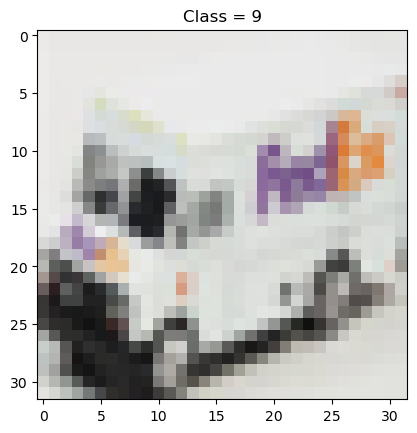

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(f'Class = {y_train[0]}')
plt.show()

In [ ]:
x_train_flatten = x_train.reshape((x_train.shape[0], 32*32*3))
x_test_flatten = x_test.reshape((x_test.shape[0], 32*32*3))

## 1. Multi-Layer Perceptrons

Consider the following fully connected neural network:

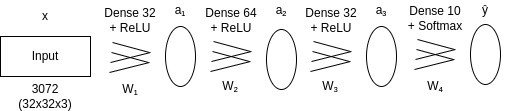

**a)** How many parameters (including biases) does this network have? Explicitly show your computations. 

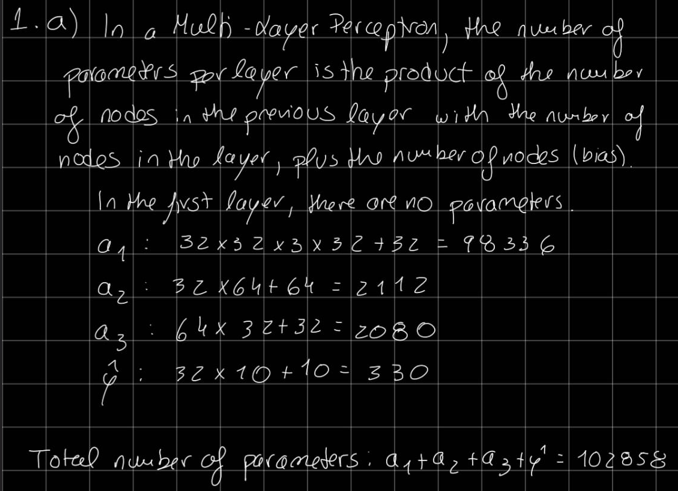

**b)** Derive the backward pass for $W_1$. To simplify, assume that $\frac{\partial L}{\partial a_2}$ is already computed. Show the shape of each variable you declare.

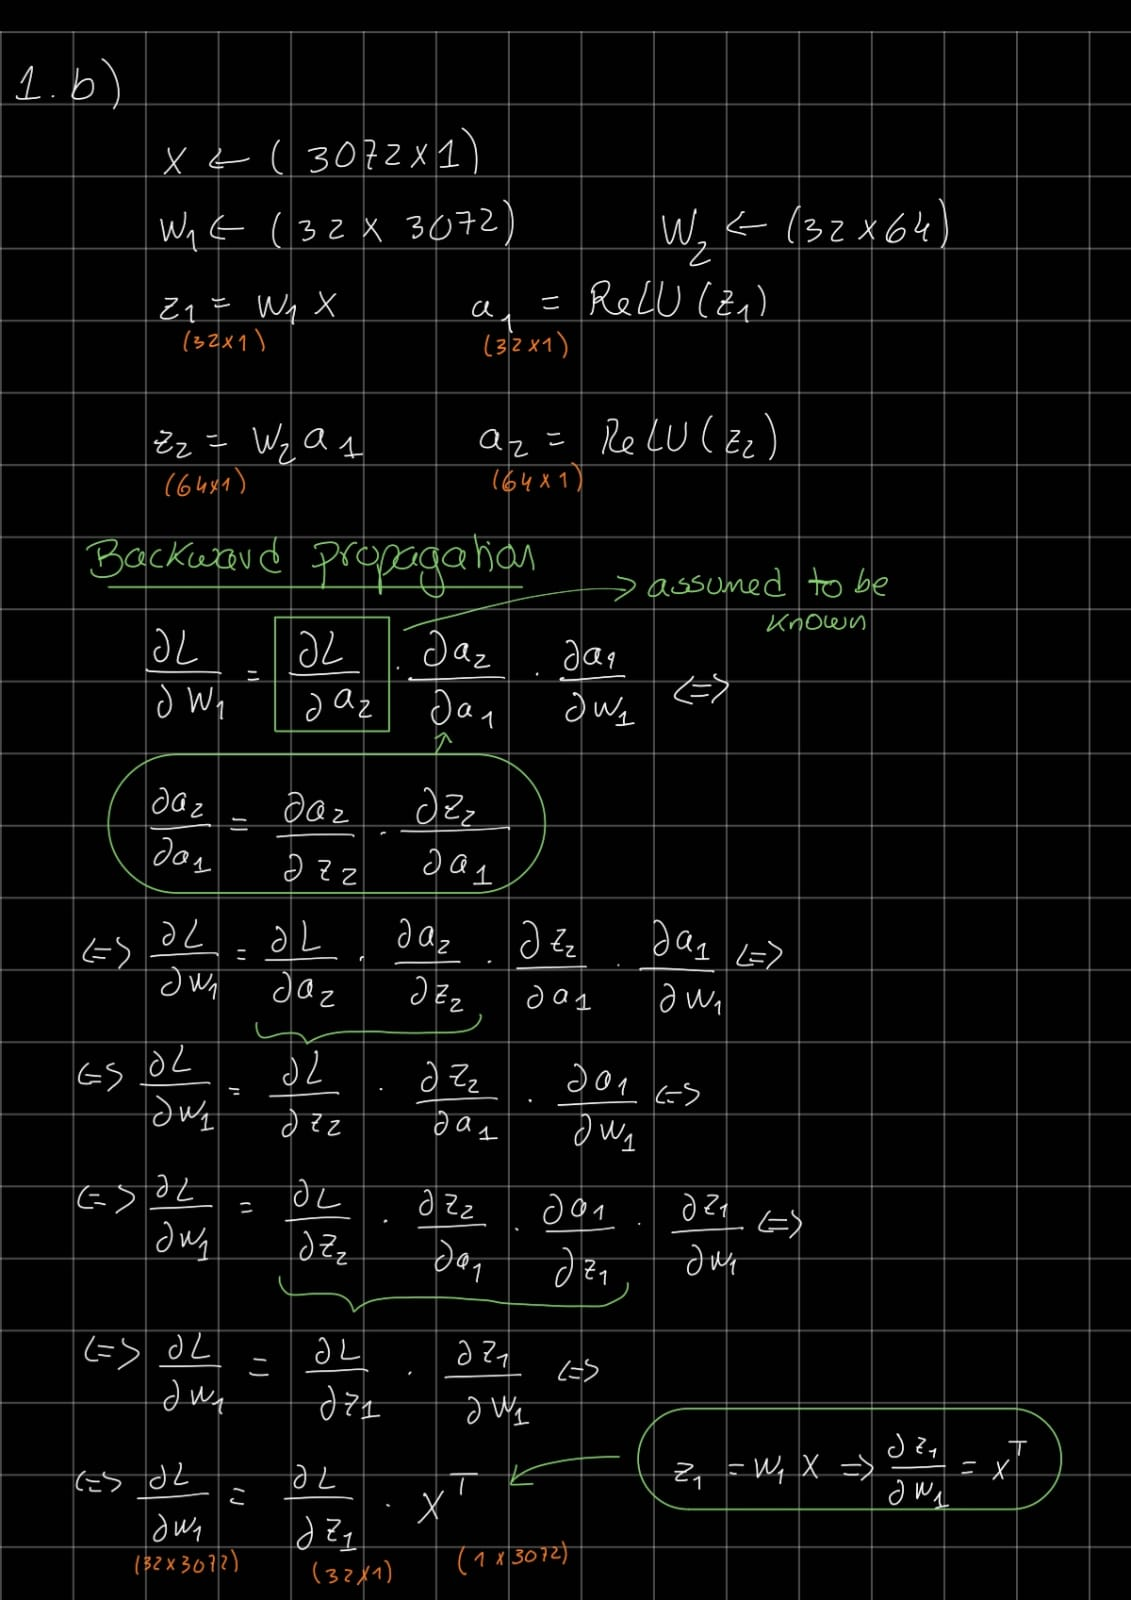

**c)** Create this neural network in Keras.

In [ ]:
# CODE HERE
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a Sequential model
model = Sequential()


model.add(Dense(32,input_shape=(3072,)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                98336     
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 102858 (401.79 KB)
Trainable params: 102858 (401.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**d)** Train the neural network with a batch size of 32, for 100 epochs, using the Adam optimizer (with learning rate=1e-4). Reduce the batch size if you get memory errors.

In [ ]:
# CODE HERE
from tensorflow.keras import optimizers
optimizer =optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flatten,y_train,epochs=100,batch_size=32)

Epoch 1/100
157/157 [==============================] - 1s 2ms/step - loss: 1.1300 - accuracy: 0.6152
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1260 - accuracy: 0.6164
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1134 - accuracy: 0.6232
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1137 - accuracy: 0.6246
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1099 - accuracy: 0.6224
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1022 - accuracy: 0.6286
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 1.0905 - accuracy: 0.6298
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1044 - accuracy: 0.6248
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 1.0851 - accuracy: 0.6396
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 1.0818 - accura

**e)** Evaluate on the test set using accuracy as the metric.

In [ ]:
# CODE HERE
test_loss, test_acc= model.evaluate(x_test_flatten,y_test, batch_size=32)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 2.1461 - accuracy: 0.3846

Test accuracy: 0.3846000134944916


**f)** Investigate how weights are initialized in Tensorflow/Keras. What distribution is sampled from? If we had to use one of the following - Uniform(0,1) or Uniform(-1,0) - which one would you expect to work best and why?

**YOUR ANSWER HERE**

## 2. Convolutional Neural Networks

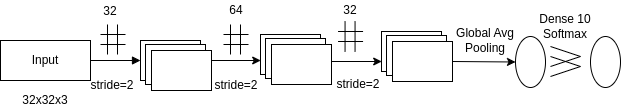

Global average pooling does the average across the height and width dimensions ($\mathbb R^{H\times W\times C}\to\mathbb R^C$).

**a)** How many parameters (including biases) does this network have? Explicitly show your computations. (Assume a regular 3x3 kernel.)

If instead the kernel was a 4-neighbor cross kernel (like in the image below), how many parameters would the neural network?

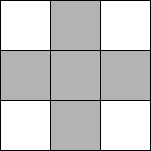

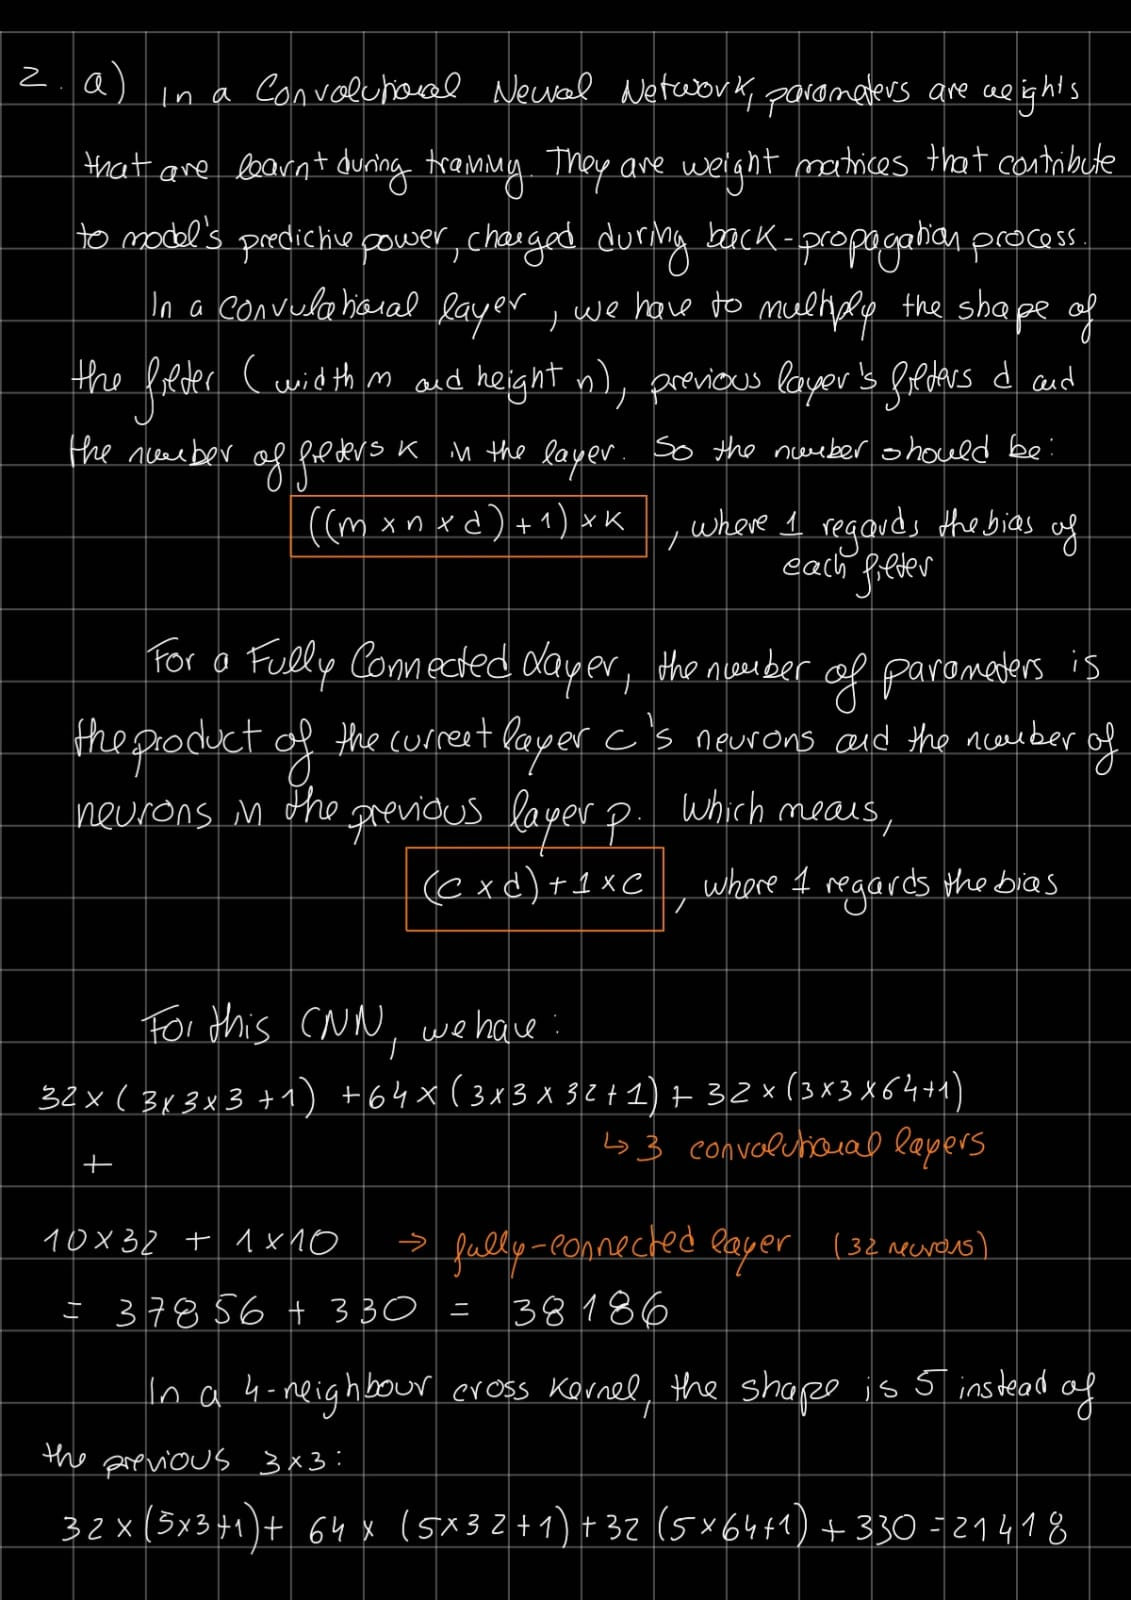


**b)** Why are there less parameters in 2.a) than in 1.a) if the number of output dimensions was the same across the neural network (32-64-32-10)?

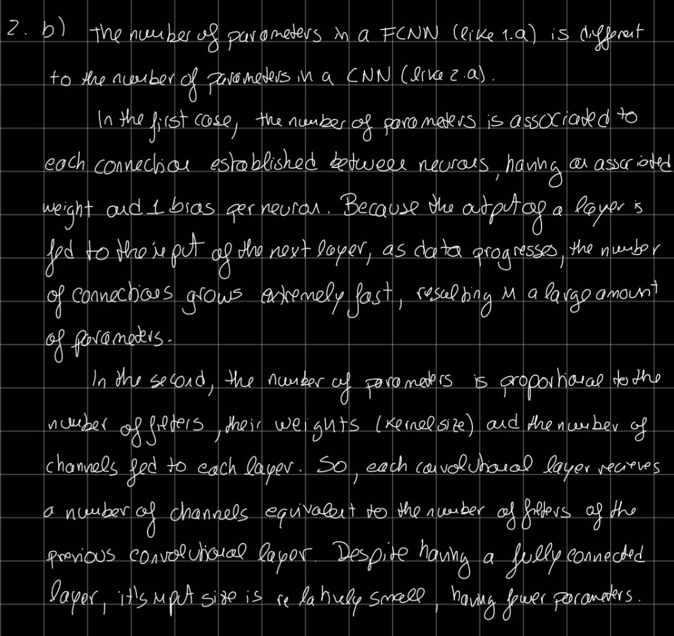

**c)** What would happen if we resized the image to 64x64 instead of 32x32? Would the number of parameters double?

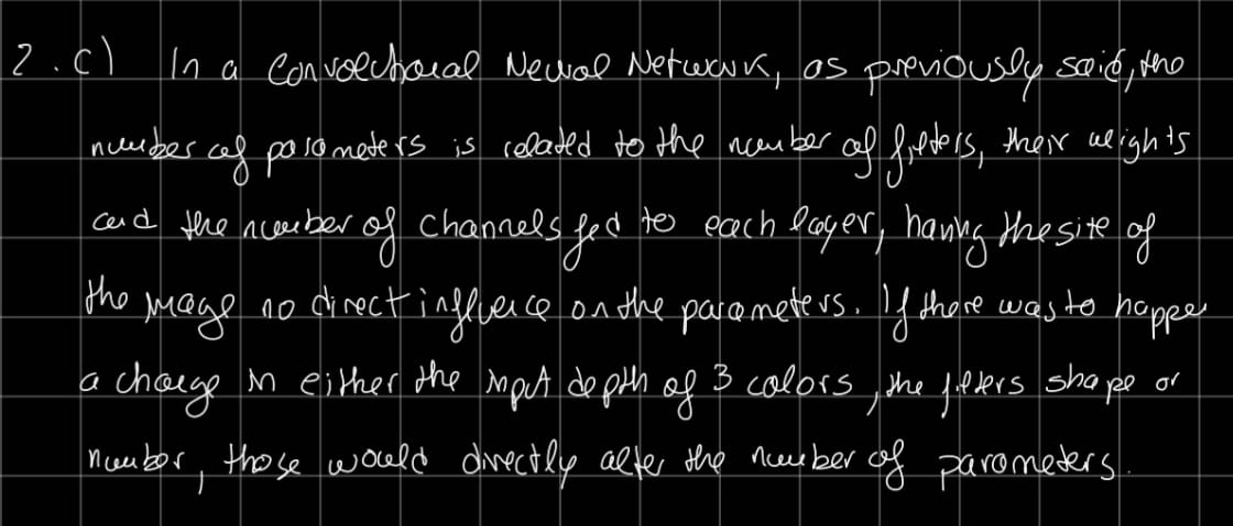

**d)** Create the neural network in Keras. Use kernel size = 3 in your convolutions.

In [ ]:
# YOUR CODE HERE
from keras.models import Sequential
from keras.layers import Conv2D, GlobalAveragePooling2D, Dense

# Define the model
model = Sequential()

# Input layer
model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(32, 32, 3), padding='valid', activation='relu'))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=3, strides=2, padding='valid', activation='relu'))

# Third convolutional layer
model.add(Conv2D(32, kernel_size=3, strides=2, padding='valid', activation='relu'))

# Global Average Pooling
model.add(GlobalAveragePooling2D())

# Dense layer with 10 units and softmax activation for classification
model.add(Dense(10, activation='softmax'))

# Display the model summary
model.summary()


**e)** Train the neural network with a batch size of 32, for 100 epochs, using the Adam optimizer (with learning rate=1e-4). Reduce the batch size if you get memory errors.

In [ ]:
# YOUR CODE HERE
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the model (use the architecture from the previous answer)
model = Sequential()
model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(32, 32, 3), padding='valid', activation='relu'))
model.add(Conv2D(64, kernel_size=3, strides=2, padding='valid', activation='relu'))
model.add(Conv2D(32, kernel_size=3, strides=2, padding='valid', activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')


**f)** Evaluate on the test set using accuracy as the metric.

In [ ]:
# YOUR CODE HERE
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

